# Proyecto de análisis de datos: análisis de sentimientos

### Autor: Luis Fernando Apáez Álvarez


#### Contenido

<ul>
    <a href="#p1"><li>Descripción</li></a>
    <a href="#p2"><li>Limpieza de datos</li></a>
    <ul>
        <a href="#p21"><li>Nube de palabras</li></a>
    </ul>
    <a href="#p3"><li>Análisis de sentimientos</li></a>
</ul>

---

## Descripción <a id="p1"></a>

En el conjunto de datos referente a las encuestas tenemos dos columnas de comentarios: una para los talleres y otra para las secuencias didácticas.

Lo que haremos a continuación será implementar un análisis de sentimientos sobre dichos comentarios. Para ello:

In [1]:
# Librerias que ocuparemos
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

# Cargaremos el archivo Encuestas.csv de la web y lo convertiremos
# en un dataframe denominado encuestas
encuestas = pd.read_csv('https://cursopypagina.github.io/CursoPy/Encuestas.csv')

# Vemos los primeros registros
encuestas.head(2)

,Unnamed: 0,Marca temporal,Dirección de correo electrónico,Escribe el nombre del taller,El lenguaje de los taller fue adecuado,Se distinguió los objetivos del taller,Fueron claras las instrucciones de los talleres,¿Qué tan ameno te pareció el taller?,Los talleres te motivaron a seguir indagando en el tema,Si tienes comentarios y/o sugerencias acerca de los talleres son bienvenidos.,El lenguaje de las secuencias didácticas te pareció apropiado,Se distinguió los objetivos de las secuencias didácticas,Fueron claros los conceptos que se formalizaron en las secuencias didácticas,¿Qué tan complicado te pareció la formalización de los conceptos en las secuencias didácticas?,¿Qué tan apropiado fue introducir los conceptos formales a partir de los talleres?,Si tienes comentarios y/o sugerencias son bienvenidos,El lenguaje de los talleres fue adecuado,Se distinguieron los objetivos del taller
0,0,21/07/2022 9:16:50,NaN,Serpientes estocásticas y escaleras aleatorias,1.0,1.0,1,1,2,Sería bueno si pudieran sugerir bibliografía ú...,Mucho,Mucho,Mucho,Poco,Poco,.,NaN,NaN
1,1,21/07/2022 9:18:07,NaN,Serpientes estocásticas y escaleras aleatorias,1.0,1.0,2,1,1,"En general el taller fue ameno, la actividad d...",Mucho,Mucho,Mucho,Mucho,Mucho,"No tengo mucho que agregar, me pareció bastant...",NaN,NaN


Serán de nuestro interés únicamente dos columnas:

In [2]:
comentarios = encuestas[["Si tienes comentarios y/o sugerencias acerca de los talleres son bienvenidos.", "Si tienes comentarios y/o sugerencias son bienvenidos"]]
comentarios.columns = [1,2]
comentarios

,1,2
0,Sería bueno si pudieran sugerir bibliografía ú...,.
1,"En general el taller fue ameno, la actividad d...","No tengo mucho que agregar, me pareció bastant..."
2,"No, fue agradable",.
3,La explicación del tema fue breve y sencillo a...,El taller fue mucho de mi agrado
4,Me gusto mucho el juego de las serpientes esto...,Me gustó la parte didáctica del taller y los t...
...,...,...
140,Me gusto mucho la dinámica del taller y coo fu...,Entendi muy bien el tema con el ejercicio de l...
141,-----,----
142,son muy comprensivas e hicieron muy ameno <3el...,ninguno
143,"Nop, las chicas fueron muy amables y alegres.",Me gusto mucho lo dicactico que fue su taller ...


## Limpieza de datos <a id="p2"></a>

Lo que haremos será realizar una limpieza sobre las cadenas de texto de los comentarios, así como quitar posibles valores nulos. De tal manera

In [3]:
# definimos un dataframe por taller y secuencia
coment_taller = pd.DataFrame(comentarios[1])
coment_secuencia = pd.DataFrame(comentarios[2])

display(coment_taller.info())
display(coment_secuencia.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       145 non-null    object
dtypes: object(1)
memory usage: 1.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2       145 non-null    object
dtypes: object(1)
memory usage: 1.3+ KB


None

Al parecer no tenemos valores nulos, pero

In [4]:
# tenemos valores donde el comentario es un punto
coment_secuencia[coment_secuencia[2]=="."]

,2
0,.
2,.
11,.
21,.
42,.
73,.
77,.
82,.
84,.
106,.


Lo que haremos será agregar un columna nueva con la longitud de la cadena de texto del comentario

In [5]:
coment_secuencia["long"] = coment_secuencia[2].apply(lambda x: len(x))
coment_taller["long"] = coment_taller[1].apply(lambda x: len(x))

coment_taller.head(5)

,1,long
0,Sería bueno si pudieran sugerir bibliografía ú...,68
1,"En general el taller fue ameno, la actividad d...",164
2,"No, fue agradable",18
3,La explicación del tema fue breve y sencillo a...,66
4,Me gusto mucho el juego de las serpientes esto...,104


Nos quedaremos con los comentarios que tengan una longitud, como cadena de texto, mayor a 3

In [6]:
print(coment_secuencia.shape)
print(coment_taller.shape)

(145, 2)
(145, 2)


In [7]:
coment_secuencia = coment_secuencia[coment_secuencia["long"] > 3]
coment_taller = coment_taller[coment_taller["long"] > 3]

print(coment_secuencia.shape)
print(coment_taller.shape)

(116, 2)
(134, 2)


Lo que sigue es convertir a minúsculas y quitar tanto puntos y comas como acentos

In [8]:
# diccionario que utilizaremos para quitar acentos
replace_dict = {
    'á': 'a',
    'é': 'e',
    'í': 'i',
    'ó': 'o',
    'ú': 'u'
}

def limpieza(coment):
    # Nos quedamos solo con caracteres alfanumericos del comentario
    # ya convertido a minusculas
    cad = re.sub(r'[\W]+', ' ', coment.lower())
    
    # quitamos acentos
    pattern = re.compile(r'[áéíóú]')
    cad_clean = pattern.sub(lambda match: replace_dict[match[0]], cad)
    return cad_clean

# limpiamos las cadenas de texto de los comentarios 
coment_secuencia[2] = coment_secuencia[2].apply(lambda x: limpieza(x))
coment_taller[1] = coment_taller[1].apply(lambda x: limpieza(x))

# veamos
coment_secuencia.head(5)

,2,long
1,no tengo mucho que agregar me parecio bastante...,72
3,el taller fue mucho de mi agrado,32
4,me gusto la parte didactica del taller y los t...,59
5,me hubiera gustado profundizar en mas temas de...,60
6,en el taller las explicaciones y conceptos fue...,56


### Nube de palabras <a id="p21"></a>

Ahora bien, lo que haremos será crear una nube de palabras para los comentarios del taller y de la secuencia didáctica:

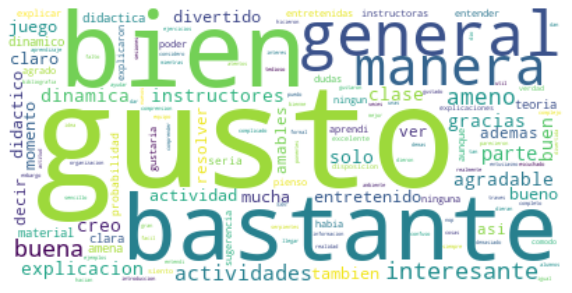

In [9]:
# Importacion necesaria
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Palabras vacias del espagniol
stop_words_sp = set(stopwords.words('spanish')).union(['taller', 'tema', 'mas',
                                                      'temas', 'concepto', 'formas',
                                                      'conceptos', 'parecio',
                                                      'secuencia didactica',
                                                      'cada', 'alguien',
                                                      'explicando', 'si',
                                                      'definiciones', 'comentario',
                                                      'tiempo', 'forma'])

# configuracion del tamagnio del grafico
plt.figure(figsize=(10, 6))

# Juntamos todos los comentarios del taller en una sola cadena de texto
taller_1 = ""
for i in list(coment_taller[1]):
    taller_1 += i 
taller_1

# Instanciamos un objeto WordCloud
word_cloud = WordCloud(background_color='white', stopwords=stop_words_sp)

# Generamos la nube de palabras mediante el metodo generate()
# aplicado a la resegnia mas larga
cloud_1 = word_cloud.generate(taller_1)

# Graficamos
plt.imshow(cloud_1, interpolation='bilinear')

# Configuramos que los ejes no sean visibles
plt.axis('off')
plt.show()

Vemos, intuitivamente, que los comentarios sobre los talleres fueron muy buenos (positivos).

Hacemos lo mismo pero ahora para las secuencias didácticas

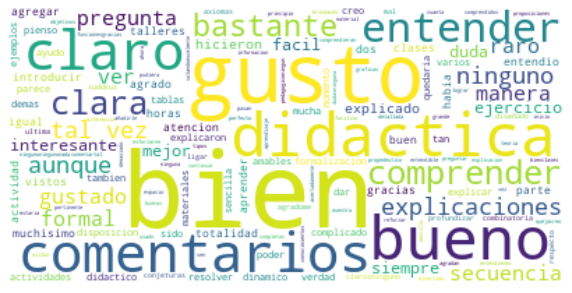

In [10]:
# configuracion del tamagnio del grafico
plt.figure(figsize=(10, 6))

# Juntamos todos los comentarios del taller en una sola cadena de texto
secuencia_1 = ""
for i in list(coment_secuencia[2]):
    secuencia_1 += i 
secuencia_1

# Generamos la nube de palabras mediante el metodo generate()
# aplicado a la resegnia mas larga
cloud_2 = word_cloud.generate(secuencia_1)

# Graficamos
plt.imshow(cloud_2, interpolation='bilinear')

# Configuramos que los ejes no sean visibles
plt.axis('off')
plt.show()

Al parecer, también tenemos buenos comentarios positivos respecto a las secuencias didácticas.

Posteriormente, definiremos dos corpus (uno para los comentarios de los talleres y otro para el de las secuencias didácticas); después, vectorizaremos dichos corpus utilizando el algoritmo tf-idf:

In [11]:
# Importaciones necesarias
from gensim.models.tfidfmodel import TfidfModel
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize

# Creamos dos "documentos" con los comentarios de cada dataframe
documento1 = list(coment_taller[1])
documento2 = list(coment_secuencia[2])

# Tokenizamos cada documento
docs_tokenized_1 = [word_tokenize(x) for x in documento1]
docs_tokenized_2 = [word_tokenize(x) for x in documento2]

# Quitaremos las palabras vacias de cada documento
docs_tokenized_1_clean = []
for i in range(len(docs_tokenized_1)):
    comentario = []
    for j in range(len(docs_tokenized_1[i])):
        if docs_tokenized_1[i][j] not in stop_words_sp:
            comentario.append(docs_tokenized_1[i][j])
    docs_tokenized_1_clean.append(comentario)
    
docs_tokenized_2_clean = []
for i in range(len(docs_tokenized_2)):
    comentario = []
    for j in range(len(docs_tokenized_2[i])):
        if docs_tokenized_2[i][j] not in stop_words_sp:
            comentario.append(docs_tokenized_2[i][j])
    docs_tokenized_2_clean.append(comentario)
            
# Creamos la asignacion con una identificacion para cada token y la 
# frecuencia de aparicion de cada token para cada documento
dictionary_1 = Dictionary(docs_tokenized_1_clean)
dictionary_2 = Dictionary(docs_tokenized_2_clean)

# Crearemos dos corpus
corpus_1 = [dictionary_1.doc2bow(doc) for doc in docs_tokenized_1_clean]
corpus_2 = [dictionary_2.doc2bow(doc) for doc in docs_tokenized_2_clean]

# Aplicamos el modelo tfidf al corpus que habiamos
# creado antes
tfidf_1 = TfidfModel(corpus_1)
tfidf_2 = TfidfModel(corpus_2)

# Crearemos dos dataframes a partir de los resultados obtenidos
# de la vectorizacion en los dos corpus

list_auxiliar_1 = []
list_auxiliar_2 = []

# Recorremos i sobre el numero total de documentos
for i in range(len(documento1)):
    # Creamos un dataframe con los valores obtenidos (token id, frecuencia tf-idf)
    # para el documento i del corpus
    df = pd.DataFrame(tfidf_1[corpus_1[i]])
    
    # Agremos dicho dataframe a la lista auxiliar
    list_auxiliar_1.append(df)
    
for i in range(len(documento2)):
    # Creamos un dataframe con los valores obtenidos (token id, frecuencia tf-idf)
    # para el documento i del corpus
    df = pd.DataFrame(tfidf_2[corpus_2[i]])
    
    # Agremos dicho dataframe a la lista auxiliar
    list_auxiliar_2.append(df)
    
# concatenamos los dataframes de la lista auxiliar
df1 = pd.concat(list_auxiliar_1).rename(columns={0: 'Token ID', 1: 'Medida tf-idf'})
df2 = pd.concat(list_auxiliar_2).rename(columns={0: 'Token ID', 1: 'Medida tf-idf'})

# Ordenamos de manera descendiente para el dataframe con la info de los talleres
df1.sort_values('Medida tf-idf', ascending=False)[0:8]

,Token ID,Medida tf-idf
0,69,1.0
0,183,1.0
0,25,1.0
0,35,1.0
0,12,1.0
0,1,1.0
0,1,1.0
0,196,1.0


In [12]:
df1 = df1.drop_duplicates(subset = ['Token ID'])
df2 = df2.drop_duplicates(subset = ['Token ID'])

los cuales representan las palabras más importantes del ``corpus1``, es decir, de los comentarios de los talleres y del ``corpus2``. Veamos cuáles fueron las palabras más importantes para los comentarios de los talleres

In [13]:
# tokens id de interes
ids = list(df1.sort_values('Medida tf-idf', ascending=False)[0:8]["Token ID"])

# diccionario auxiliar
dic_aux = {}

for key, value in dictionary_1.token2id.items():
    dic_aux[value] = key
    
# veamos las palabras con los tokens id de interes
for i in ids:
    print(dic_aux[i])

agradable
ningun
super
bonito
agrado
nop
ninguno
parecido


Podemos hacer lo mismo para los comentarios de las secuencias didácticas:

In [14]:
# tokens id de interes
ids = list(df2.sort_values('Medida tf-idf', ascending=False)[0:8]["Token ID"])

# diccionario auxiliar
dic_aux = {}

for key, value in dictionary_1.token2id.items():
    dic_aux[value] = key
    
# veamos las palabras con los tokens id de interes
for i in ids:
    print(dic_aux[i])

amplia
probabilidad
muchas
recursion
eficiente
basico
didactico
sugerir


## Análisis de sentimientos <a id="p3"></a>

Ahora bien, lo que haremos será traducir los comentarios del español al inglés para posteriormente realizar el análisis de sentimientos de éstos. Así, comenzamos por ver los comentarios, originales, sobre los talleres y las secuencias:

In [15]:
# definimos un dataframe por taller y secuencia
coment_taller_a = pd.DataFrame(comentarios[1])
coment_secuencia_a = pd.DataFrame(comentarios[2])

# agregamos una columna con la longitud de la cadena de texto del comentario
coment_secuencia_a["long"] = coment_secuencia_a[2].apply(lambda x: len(x))
coment_taller_a["long"] = coment_taller_a[1].apply(lambda x: len(x))

# solo nos quedamos con comentarios cuya longitud sea mayor a 3
coment_secuencia_a = coment_secuencia_a[coment_secuencia_a["long"] > 3]
coment_taller_a = coment_taller_a[coment_taller_a["long"] > 3]

# limpiamos las cadenas de texto de los comentarios 
coment_secuencia_a[2] = coment_secuencia_a[2].apply(lambda x: limpieza(x))
coment_taller_a[1] = coment_taller_a[1].apply(lambda x: limpieza(x))

# veamos
coment_secuencia_a.head(5)

,2,long
1,no tengo mucho que agregar me parecio bastante...,72
3,el taller fue mucho de mi agrado,32
4,me gusto la parte didactica del taller y los t...,59
5,me hubiera gustado profundizar en mas temas de...,60
6,en el taller las explicaciones y conceptos fue...,56


Lo que haremos después será traducir los comentarios al inglés, agregándolos a una columna nueva de cada dataframe

In [16]:
# Importacion necesaria
from textblob import TextBlob

# funcion para realizar la traduccion
def traduccion(x):
    # instanciamos 
    m = TextBlob(x)
    # traducimos
    msj_en = str(m.translate(from_lang="es", to="en"))
    return msj_en

# Agregamos columnas nuevas
secuencias_ingles = []
for i in range(len(coment_secuencia_a)):
    aux = ""
    try:
        aux = traduccion(coment_secuencia_a.iloc[i][2])
    except:
        aux = "Error"
    secuencias_ingles.append(aux)
    
# Agregamos la columna nueva    
coment_secuencia_a["Ingles"] = secuencias_ingles

taller_ingles = []
for i in range(len(coment_taller_a)):
    aux = ""
    try:
        aux = traduccion(coment_taller_a.iloc[i][1])
    except:
        aux = "Error"
    taller_ingles.append(aux)
    
# Agregamos la columna nueva    
coment_taller_a["Ingles"] = taller_ingles

# veamos
coment_taller_a

,1,long,Ingles
0,seria bueno si pudieran sugerir bibliografia u...,68,It would be good if they could suggest useful ...
1,en general el taller fue ameno la actividad de...,164,"In general, the workshop was entertaining the ..."
2,no fue agradable,18,It was not nice
3,la explicacion del tema fue breve y sencillo a...,66,The explanation of the subject was brief and s...
4,me gusto mucho el juego de las serpientes esto...,104,I really liked the game of the stochastic snak...
...,...,...,...
140,me gusto mucho la dinamica del taller y coo fu...,70,I really liked the dynamics of the workshop an...
141,,5,Error
142,son muy comprensivas e hicieron muy ameno 3el ...,98,They are very comprehensive and made very enjo...
143,nop las chicas fueron muy amables y alegres,45,nop girls were very friendly and cheerful


Veamos qué ocurre con los comentarios que nos arrojan ``Error`` en la traducción

In [17]:
coment_secuencia_a[coment_secuencia_a["Ingles"] == "Error"]

,2,long,Ingles
109,,6,Error
138,,4,Error
141,,4,Error


In [18]:
coment_taller_a[coment_taller_a["Ingles"] == "Error"]

,1,long,Ingles
141,,5,Error


Omitimos dichas columnas

In [19]:
coment_secuencia_a = coment_secuencia_a[coment_secuencia_a["Ingles"] != "Error"]
coment_taller_a = coment_taller_a[coment_taller_a["Ingles"] != "Error"]

coment_taller_a[coment_taller_a["Ingles"] == "Error"]

,1,long,Ingles


Luego, analizaremos la polaridad de cada uno de los comentarios en inglés:

In [20]:
# definimos una funcion para obtener el sentimiento del comentario
def sentimiento(x):
    valence = TextBlob(x)
    return valence.sentiment[0]
    
# Aplicamos a cada dataframe
coment_taller_a["Polaridad"] = coment_taller_a["Ingles"].apply(lambda x: sentimiento(x))
coment_secuencia_a["Polaridad"] = coment_secuencia_a["Ingles"].apply(lambda x: sentimiento(x))

# veamos
coment_taller_a.head()

,1,long,Ingles,Polaridad
0,seria bueno si pudieran sugerir bibliografia u...,68,It would be good if they could suggest useful ...,0.500000
1,en general el taller fue ameno la actividad de...,164,"In general, the workshop was entertaining the ...",0.360000
2,no fue agradable,18,It was not nice,-0.300000
3,la explicacion del tema fue breve y sencillo a...,66,The explanation of the subject was brief and s...,0.083333
4,me gusto mucho el juego de las serpientes esto...,104,I really liked the game of the stochastic snak...,0.011111


donde -1 indica un sentimiento muy negativo, 0 un sentimiento neutral y 1 un sentimiento muy positivo. Así:

In [21]:
# Clasificaremos el sentimiento de acuerdo a la polaridad:
def clasificador(x):
    if x <= -0.333:
        return "Negativo"
    elif (x <= 0.333) and (x > -0.333):
        return "Neutro"
    else:
        return "Positivo"
    
# Aplicamos a cada dataframe
coment_taller_a["Sentimiento"] = coment_taller_a["Polaridad"].apply(lambda x: clasificador(x))
coment_secuencia_a["Sentimiento"] = coment_secuencia_a["Polaridad"].apply(lambda x: clasificador(x))

# Veamos
coment_secuencia_a

,2,long,Ingles,Polaridad,Sentimiento
1,no tengo mucho que agregar me parecio bastante...,72,I do not have much to add the workshop seemed ...,0.200000,Neutro
3,el taller fue mucho de mi agrado,32,The workshop was a lot of my liking,0.000000,Neutro
4,me gusto la parte didactica del taller y los t...,59,I liked the didactic part of the workshop and ...,0.050000,Neutro
5,me hubiera gustado profundizar en mas temas de...,60,I would have liked to deepen more combinatoria...,0.550000,Positivo
6,en el taller las explicaciones y conceptos fue...,56,In the workshop the explanations and concepts ...,0.100000,Neutro
...,...,...,...,...,...
134,me ayudo mucho a comprender los conceptos el u...,60,It helped me a lot to understand the concepts ...,0.000000,Neutro
140,entendi muy bien el tema con el ejercicio de l...,56,I understood the subject very well with the ex...,0.016667,Neutro
142,ninguno,8,none,0.000000,Neutro
143,me gusto mucho lo dicactico que fue su taller ...,83,I really liked how dicactic his workshop was a...,0.600000,Positivo


Finalmente, veamos el número total de cada tipo de sentimiento para los comentarios del taller y las secuencias didácticas:

In [22]:
# Realizamos la importacion necesaria
from IPython.display import Markdown

# definimos una funcion que ocupara la funcion recien importada
# Markdown()
def printmd(string):
    # Mostramos en salida la cadena de texto ingresada
    # pero en formato Markdown (dentro de Markdown podemos
    # escribir codigo latex)
    display(Markdown(string))
    
printmd("### Comentarios sobre el taller")   
print(f'Positivos: {coment_taller_a.value_counts("Sentimiento")[1]}')
print(f'Neutros: {coment_taller_a.value_counts("Sentimiento")[0]}')
print(f'Negativos: {coment_taller_a.value_counts("Sentimiento")[2]}')

print()
printmd("### Comentarios sobre las secuencias")   
print(f'Positivos: {coment_secuencia_a.value_counts("Sentimiento")[1]}')
print(f'Neutros: {coment_secuencia_a.value_counts("Sentimiento")[0]}')
print(f'Negativos: {coment_secuencia_a.value_counts("Sentimiento")[2]}')

### Comentarios sobre el taller

Positivos: 63
Neutros: 67
Negativos: 3



### Comentarios sobre las secuencias

Positivos: 44
Neutros: 68
Negativos: 1


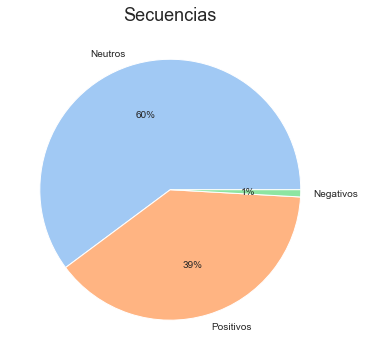

In [23]:
# estilo de graficacion
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))

# configuracion de la paleta de colores
colors = sns.color_palette('pastel')[0:3]

# Numero por tipo
sentiments_1 = [coment_secuencia_a.value_counts("Sentimiento")[i] for i in range(3)]
labels_1 = ["Neutros", "Positivos", "Negativos"]

# Graficamos
plt.pie(sentiments_1, labels=labels_1, colors=colors, autopct='%.0f%%')
plt.title("Secuencias", size=18)
plt.show()

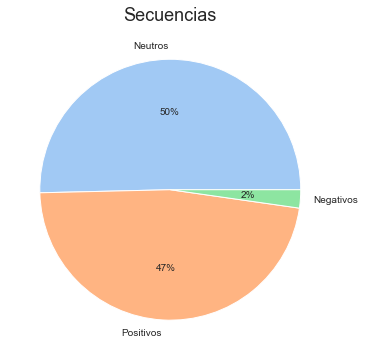

In [24]:
plt.figure(figsize=(8,6))

# Numero por tipo
sentiments_2 = [coment_taller_a.value_counts("Sentimiento")[i] for i in range(3)]

# Graficamos
plt.pie(sentiments_2, labels=labels_1, colors=colors, autopct='%.0f%%')
plt.title("Secuencias", size=18)
plt.show()

Con lo anterior podemos concluir que los comentarios dados por los estudiantes sobre los talleres y las secuencias didácticas fueron muy buenos. Además, se obtuvieron una cantidad muy baja de comentarios negativos.

Adicionalmente agregaremos otra columna proveniente de otro análisis de sentimientos pero ahora utilizando ``NaiveBayesAnalyzer``, el cual es entrenado con un corpus de reseñas de películas. Así

In [25]:
# Importacion necesaria
import nltk

# descargamos el corpus para entrenar el modelo
nltk.download('movie_reviews')    

# importamos el analizar NaiveBayes
from textblob.sentiments import NaiveBayesAnalyzer

# definimos una funcion para obtener el sentimiento del comentario
# configurando en analizador NaiveBayes
def sentimiento_bayes(x):
    blob = TextBlob(x, analyzer=NaiveBayesAnalyzer())
    return blob.sentiment[0]
    
# Aplicamos a cada dataframe
coment_taller_a["Sentimiento_bayes"] = coment_taller_a["Ingles"].apply(lambda x: sentimiento_bayes(x))
coment_secuencia_a["Sentimiento_bayes"] = coment_secuencia_a["Ingles"].apply(lambda x: sentimiento_bayes(x))

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [26]:
# veamos
display(coment_secuencia_a.head(5))
display(coment_taller_a.head(5))

,2,long,Ingles,Polaridad,Sentimiento,Sentimiento_bayes
1,no tengo mucho que agregar me parecio bastante...,72,I do not have much to add the workshop seemed ...,0.20,Neutro,neg
3,el taller fue mucho de mi agrado,32,The workshop was a lot of my liking,0.00,Neutro,pos
4,me gusto la parte didactica del taller y los t...,59,I liked the didactic part of the workshop and ...,0.05,Neutro,pos
5,me hubiera gustado profundizar en mas temas de...,60,I would have liked to deepen more combinatoria...,0.55,Positivo,pos
6,en el taller las explicaciones y conceptos fue...,56,In the workshop the explanations and concepts ...,0.10,Neutro,pos


,1,long,Ingles,Polaridad,Sentimiento,Sentimiento_bayes
0,seria bueno si pudieran sugerir bibliografia u...,68,It would be good if they could suggest useful ...,0.500000,Positivo,neg
1,en general el taller fue ameno la actividad de...,164,"In general, the workshop was entertaining the ...",0.360000,Positivo,pos
2,no fue agradable,18,It was not nice,-0.300000,Neutro,pos
3,la explicacion del tema fue breve y sencillo a...,66,The explanation of the subject was brief and s...,0.083333,Neutro,pos
4,me gusto mucho el juego de las serpientes esto...,104,I really liked the game of the stochastic snak...,0.011111,Neutro,pos


Gráficamente

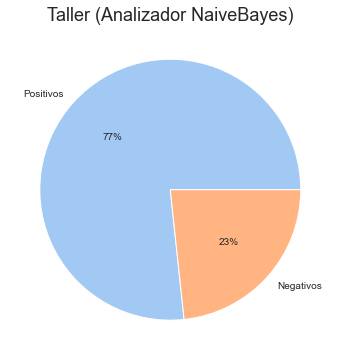

In [27]:
plt.figure(figsize=(8,6))

# Numero por tipo
sentiments_2_2 = [coment_taller_a.value_counts("Sentimiento_bayes")[i] for i in range(2)]
labels_2 = ["Positivos", "Negativos"]

# Graficamos
plt.pie(sentiments_2_2, labels=labels_2, colors=colors, autopct='%.0f%%')
plt.title("Taller (Analizador NaiveBayes)", size=18)
plt.show()

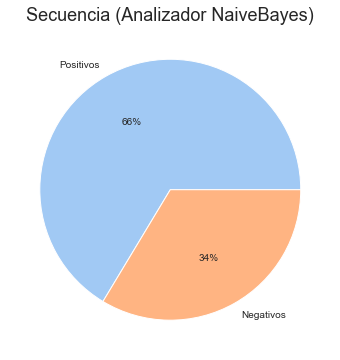

In [31]:
plt.figure(figsize=(8,6))

# Numero por tipo
sentiments_2_1 = [coment_secuencia_a.value_counts("Sentimiento_bayes")[i] for i in range(2)]

# Graficamos
plt.pie(sentiments_2_1, labels=labels_2, colors=colors, autopct='%.0f%%')
plt.title("Secuencia (Analizador NaiveBayes)", size=18)
plt.show()

donde, de nuevo, en su mayoría obtenemos comentarios positivos tanto en el taller como en la secuencias didáctica. De hecho

In [33]:
display(coment_secuencia_a.value_counts("Sentimiento_bayes"))
display(coment_taller_a.value_counts("Sentimiento_bayes"))

Sentimiento_bayes
pos    75
neg    38
dtype: int64

Sentimiento_bayes
pos    102
neg     31
dtype: int64

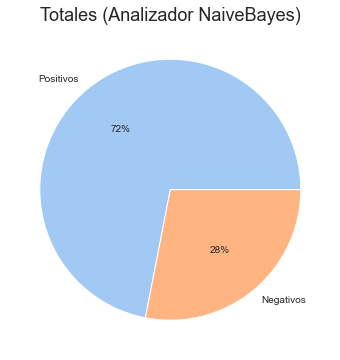

In [35]:
plt.figure(figsize=(8,6))

# Numero por tipo
sentiments_total = [75+102, 38+31]

# Graficamos
plt.pie(sentiments_total, labels=labels_2, colors=colors, autopct='%.0f%%')
plt.title("Totales (Analizador NaiveBayes)", size=18)
plt.show()

en total, el 72% de los comentarios (tanto para el taller como para la secuencia didáctica) fueron clasificados como positivos y 28% como negativos.

---

Finalmente, exportaremos los dos dataframes para posteriormente generar un tablero en Power BI:

In [30]:
# Definimos los dataframes a exportar
coment_taller_a_export = coment_taller_a.reset_index().rename(columns={"index": "ID"})
coment_taller_a_export = coment_taller_a_export[["ID", "Sentimiento", "Sentimiento_bayes"]]

coment_secuencia_a_export = coment_secuencia_a.reset_index().rename(columns={"index": "ID"})
coment_secuencia_a_export = coment_secuencia_a_export[["ID", "Sentimiento", "Sentimiento_bayes"]]

# Exportamos
coment_taller_a_export.to_csv("coment_taller_sentimientos.csv")
coment_secuencia_a_export.to_csv("coment_secuencia_sentimientos.csv")